<a href="https://www.kaggle.com/code/abdulrahmanalabrash/housing-data-wrangler?scriptVersionId=186253978" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

  # Data Cleaning

When working with multiple data sources, there are many chances for data to be incorrect, duplicated, or mislabeled. If data is wrong, outcomes and algorithms are unreliable, even though they may look correct. Data cleaning is the process of changing or eliminating garbage, incorrect, duplicate, corrupted, or incomplete data in a dataset.

## Import the data 

In [1]:
# import necessary library 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from sklearn.preprocessing import OneHotEncoder

# read the data  
df = pd.read_excel (r'/kaggle/input/data-cleaning/house_price_data_7000.xlsx')
# Print the first five rows of the data
pd.set_option('display.max_columns', None)
df.head()

Order  Brüt m²  Net m² Oda Sayısı Banyo Sayısı Binadaki Kat Sayısı  \
0   1117      110   100.0        3+1            1                   3   
1   5958      105    96.0        3+1            1                   3   
2   5709      110   100.0        2+1            2                   4   
3    366       95    80.0        2+1            1                   4   
4   2540      135   130.0        3+1            1                   5   

  Bulunduğu Kat Bina Yaşı       Isıtma Tipi Mobilya Durumu Kullanım Durumu  \
0             3         3  Kombi (Doğalgaz)            NaN             Boş   
1             3         3  Kombi (Doğalgaz)            NaN             Boş   
2  Yüksek Giriş         0  Kombi (Doğalgaz)        Eşyasız             Boş   
3             1         2  Kombi (Doğalgaz)        Eşyasız        Kiracılı   
4  Yüksek Giriş         0  Kombi (Doğalgaz)        Eşyasız             Boş   

  Yapının Durumu Konut Şekli  Kira Getirisi    Kimden Krediye Uygun   Price  \
0          Sıfır  En Üst Kat            NaN  Danışman          Evet  270000   
1          Sıfır  En Üst Kat            NaN  Danışman          Evet  260000   
2            NaN         NaN            0.0       NaN          Evet  190500   
3            NaN     Ara Kat          850.0       NaN         Hayır  235000   
4            NaN         NaN            0.0       NaN          Evet  170000   

   Location Lat  Location Lon   Location1 Location2  Location3  Aidat  \
0     41.051309     28.042897   Gümüşyaka   Silivri   İstanbul    NaN   
1     41.051382     28.042956   Gümüşyaka   Silivri   İstanbul    NaN   
2     41.125086     28.062348     Balaban   Silivri   İstanbul    0.0   
3     41.080407     28.079158     Balaban   Silivri   İstanbul    NaN   
4     41.091091     28.091119  Sancaktepe   Silivri   İstanbul   80.0   

  Takasa Uygun                                 Station Name  Location Lat.1  \
0         Evet  Beylikdüzü Sondurak (TÜYAP) Metrobüs Durağı       41.021789   
1          NaN                    - Beykent Metrobüs Durağı       41.019212   
2         Evet       - Cumhuriyet Mahallesi Metrobüs Durağı       41.015435   
3          NaN        - Beylikdüzü Belediye Metrobüs Durağı       41.012566   
4         Evet                 - Beylikdüzü Metrobüs Durağı       41.012566   

   Location Lon.1  
0       28.625406  
1       28.631626  
2       28.641765  
3       28.649338  
4       28.649338

In [2]:
#first we want to get an idea about our data
#print the info of the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7039 entries, 0 to 7038
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order                7039 non-null   int64  
 1   Brüt m²              7039 non-null   int64  
 2   Net m²               6959 non-null   float64
 3   Oda Sayısı           7037 non-null   object 
 4   Banyo Sayısı         7038 non-null   object 
 5   Binadaki Kat Sayısı  6743 non-null   object 
 6   Bulunduğu Kat        6786 non-null   object 
 7   Bina Yaşı            6776 non-null   object 
 8   Isıtma Tipi          6740 non-null   object 
 9   Mobilya Durumu       6354 non-null   object 
 10  Kullanım Durumu      6688 non-null   object 
 11  Yapının Durumu       4432 non-null   object 
 12  Konut Şekli          5651 non-null   object 
 13  Kira Getirisi        5273 non-null   float64
 14  Kimden               4274 non-null   object 
 15  Krediye Uygun        7039 non-null   o

In [3]:
df.dropna(subset=["Location Lat", "Location Lon"], inplace=True)
# Create a new column with tuples of (Latitude, Longitude)
df['Lat_Long'] = df.apply(lambda row: (row['Location Lat'], row['Location Lon']), axis=1)
# Display the DataFrame with the new column
df.head(2)

Order  Brüt m²  Net m² Oda Sayısı Banyo Sayısı Binadaki Kat Sayısı  \
0   1117      110   100.0        3+1            1                   3   
1   5958      105    96.0        3+1            1                   3   

  Bulunduğu Kat Bina Yaşı       Isıtma Tipi Mobilya Durumu Kullanım Durumu  \
0             3         3  Kombi (Doğalgaz)            NaN             Boş   
1             3         3  Kombi (Doğalgaz)            NaN             Boş   

  Yapının Durumu Konut Şekli  Kira Getirisi    Kimden Krediye Uygun   Price  \
0          Sıfır  En Üst Kat            NaN  Danışman          Evet  270000   
1          Sıfır  En Üst Kat            NaN  Danışman          Evet  260000   

   Location Lat  Location Lon  Location1 Location2  Location3  Aidat  \
0     41.051309     28.042897  Gümüşyaka   Silivri   İstanbul    NaN   
1     41.051382     28.042956  Gümüşyaka   Silivri   İstanbul    NaN   

  Takasa Uygun                                 Station Name  Location Lat.1  \
0         Evet  Beylikdüzü Sondurak (TÜYAP) Metrobüs Durağı       41.021789   
1          NaN                    - Beykent Metrobüs Durağı       41.019212   

   Location Lon.1                            Lat_Long  
0       28.625406  (41.051309314493, 28.042896738582)  
1       28.631626   (41.051382132092, 28.04295574718)

In [4]:
map_c = folium.Map(location = [41.0082, 28.9784] , zoom_start = 10)

df_c = df[["Lat_Long"]]
for index, row in df_c.iterrows():
    location = row["Lat_Long"]  
    folium.CircleMarker(location, color = "blue", radius = 0.1, weight = 2).add_to(map_c)
# Save the map to an HTML filemap_c.save('map_c.html')
map_c

In [5]:
df.head()


Order  Brüt m²  Net m² Oda Sayısı Banyo Sayısı Binadaki Kat Sayısı  \
0   1117      110   100.0        3+1            1                   3   
1   5958      105    96.0        3+1            1                   3   
2   5709      110   100.0        2+1            2                   4   
3    366       95    80.0        2+1            1                   4   
4   2540      135   130.0        3+1            1                   5   

  Bulunduğu Kat Bina Yaşı       Isıtma Tipi Mobilya Durumu Kullanım Durumu  \
0             3         3  Kombi (Doğalgaz)            NaN             Boş   
1             3         3  Kombi (Doğalgaz)            NaN             Boş   
2  Yüksek Giriş         0  Kombi (Doğalgaz)        Eşyasız             Boş   
3             1         2  Kombi (Doğalgaz)        Eşyasız        Kiracılı   
4  Yüksek Giriş         0  Kombi (Doğalgaz)        Eşyasız             Boş   

  Yapının Durumu Konut Şekli  Kira Getirisi    Kimden Krediye Uygun   Price  \
0          Sıfır  En Üst Kat            NaN  Danışman          Evet  270000   
1          Sıfır  En Üst Kat            NaN  Danışman          Evet  260000   
2            NaN         NaN            0.0       NaN          Evet  190500   
3            NaN     Ara Kat          850.0       NaN         Hayır  235000   
4            NaN         NaN            0.0       NaN          Evet  170000   

   Location Lat  Location Lon   Location1 Location2  Location3  Aidat  \
0     41.051309     28.042897   Gümüşyaka   Silivri   İstanbul    NaN   
1     41.051382     28.042956   Gümüşyaka   Silivri   İstanbul    NaN   
2     41.125086     28.062348     Balaban   Silivri   İstanbul    0.0   
3     41.080407     28.079158     Balaban   Silivri   İstanbul    NaN   
4     41.091091     28.091119  Sancaktepe   Silivri   İstanbul   80.0   

  Takasa Uygun                                 Station Name  Location Lat.1  \
0         Evet  Beylikdüzü Sondurak (TÜYAP) Metrobüs Durağı       41.021789   
1          NaN                    - Beykent Metrobüs Durağı       41.019212   
2         Evet       - Cumhuriyet Mahallesi Metrobüs Durağı       41.015435   
3          NaN        - Beylikdüzü Belediye Metrobüs Durağı       41.012566   
4         Evet                 - Beylikdüzü Metrobüs Durağı       41.012566   

   Location Lon.1                            Lat_Long  
0       28.625406  (41.051309314493, 28.042896738582)  
1       28.631626   (41.051382132092, 28.04295574718)  
2       28.641765  (41.125085643837, 28.062347956002)  
3       28.649338  (41.080406737553, 28.079158293698)  
4       28.649338  (41.091091203271, 28.091119192749)

In [6]:
#Now we want to drop unnecessary columns
columns_to_drop = ["Location Lat", "Location Lon", "Order","Location1","Location3", "Station Name", "Location Lat.1", "Location Lon.1", "Lat_Long"]
df.drop(columns=columns_to_drop, inplace=True)

In [7]:
df.head()

Brüt m²  Net m² Oda Sayısı Banyo Sayısı Binadaki Kat Sayısı Bulunduğu Kat  \
0      110   100.0        3+1            1                   3             3   
1      105    96.0        3+1            1                   3             3   
2      110   100.0        2+1            2                   4  Yüksek Giriş   
3       95    80.0        2+1            1                   4             1   
4      135   130.0        3+1            1                   5  Yüksek Giriş   

  Bina Yaşı       Isıtma Tipi Mobilya Durumu Kullanım Durumu Yapının Durumu  \
0         3  Kombi (Doğalgaz)            NaN             Boş          Sıfır   
1         3  Kombi (Doğalgaz)            NaN             Boş          Sıfır   
2         0  Kombi (Doğalgaz)        Eşyasız             Boş            NaN   
3         2  Kombi (Doğalgaz)        Eşyasız        Kiracılı            NaN   
4         0  Kombi (Doğalgaz)        Eşyasız             Boş            NaN   

  Konut Şekli  Kira Getirisi    Kimden Krediye Uygun   Price Location2  Aidat  \
0  En Üst Kat            NaN  Danışman          Evet  270000   Silivri    NaN   
1  En Üst Kat            NaN  Danışman          Evet  260000   Silivri    NaN   
2         NaN            0.0       NaN          Evet  190500   Silivri    0.0   
3     Ara Kat          850.0       NaN         Hayır  235000   Silivri    NaN   
4         NaN            0.0       NaN          Evet  170000   Silivri   80.0   

  Takasa Uygun  
0         Evet  
1          NaN  
2         Evet  
3          NaN  
4         Evet

### Dealling with missing values and preprocessing some features

Net m² binned
small     3752
normal    2964
big        267
Name: count, dtype: int64


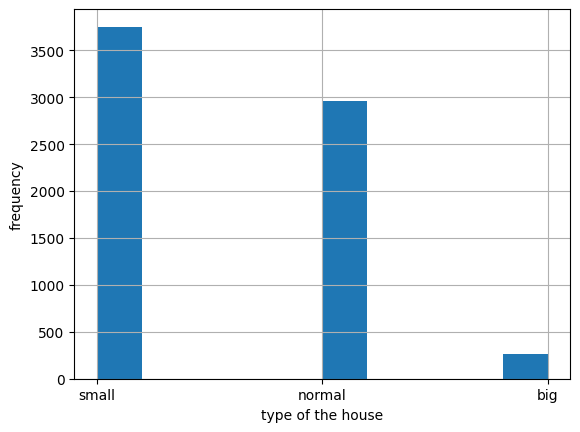

In [8]:
# Replace the missing values in 'Net m²' by multiplying 'Brüt m²' with 90 percent
df['Net m²'].fillna(df["Brüt m²"] * 0.9, inplace=True)

# Data binning, we want to change the area of the house to one of three catagories (small, normall, big)
"""
Binning is a common technique used for data preprocessing, especially when dealing with continuous 
numerical data that we want to categorize into discrete groups or ranges.
"""
bins = [0, 100, 200, 20000]
group_names = ["small", "normal", "big"]
df["Net m² binned"] = pd.cut(df["Net m²"], bins, labels=group_names)

# Print the counts of each bin
print(df['Net m² binned'].value_counts())

# Plot the histogram
hist = df["Net m² binned"].hist()
plt.ylabel('frequency')
plt.xlabel('type of the house')
plt.show()


In [9]:
#change the number of rooms to integers and drop the missing values 
df['Oda Sayısı'].value_counts()
df["Oda Sayısı"] = df["Oda Sayısı"].replace("2+1",3)
df["Oda Sayısı"] = df["Oda Sayısı"].replace("3+1",4)
df["Oda Sayısı"] = df["Oda Sayısı"].replace("1+1",2)
df["Oda Sayısı"] = df["Oda Sayısı"].replace("4+1",5)
df["Oda Sayısı"] = df["Oda Sayısı"].replace("4+2",6)
df["Oda Sayısı"] = df["Oda Sayısı"].replace("3+2",5)
df["Oda Sayısı"] = df["Oda Sayısı"].replace("5+1",6)
df["Oda Sayısı"] = df["Oda Sayısı"].replace("5+2",7)
df["Oda Sayısı"] = df["Oda Sayısı"].replace("2+2",4)
df["Oda Sayısı"] = df["Oda Sayısı"].replace("6+2",8)
df["Oda Sayısı"] = df["Oda Sayısı"].replace("1+0 (Stüdyo)",1)
df["Oda Sayısı"] = df["Oda Sayısı"].replace("6+1",7)
df["Oda Sayısı"] = df["Oda Sayısı"].replace("10 ve üzeri",10)
df["Oda Sayısı"] = df["Oda Sayısı"].replace("7+2",9)
df["Oda Sayısı"] = df["Oda Sayısı"].replace("4+3",7)
df["Oda Sayısı"] = df["Oda Sayısı"].replace("5+3",8)
df["Oda Sayısı"] = df["Oda Sayısı"].replace("8+4",12)
df["Oda Sayısı"] = df["Oda Sayısı"].replace("7+1",8)
df["Oda Sayısı"] = df["Oda Sayısı"].replace("9+1",10)
df.dropna(subset=['Oda Sayısı'],inplace = True)
df['Oda Sayısı'] = df['Oda Sayısı'].astype("int64")
print(df['Oda Sayısı'].value_counts())

Oda Sayısı
3     3296
4     2109
5      607
2      526
6      302
7       90
8       24
1       15
10       7
9        5
12       1
Name: count, dtype: int64


In [10]:
#replace the missing values with 2 since it's the common number in Istanbul 
#reduce the catagories to three-  where 3 represents the number of bathrooms that more than or equal to 3 
df['Banyo Sayısı'] = df['Banyo Sayısı'].fillna(2)
df['Banyo Sayısı'].value_counts()
df["Banyo Sayısı"] = df["Banyo Sayısı"].replace("6 ve üzeri",3)
df["Banyo Sayısı"] = df["Banyo Sayısı"].replace("4",3)
df["Banyo Sayısı"] = df["Banyo Sayısı"].replace("5",3)
df["Banyo Sayısı"] = df["Banyo Sayısı"].replace("3",3)
df["Banyo Sayısı"] = df["Banyo Sayısı"].replace("0",1)
df['Banyo Sayısı'] = df['Banyo Sayısı'].astype("int64")
print(df["Banyo Sayısı"].value_counts())

Banyo Sayısı
1    4357
2    2327
3     298
Name: count, dtype: int64


In [11]:
#reduce the catagories of number of floors to three
df['Binadaki Kat Sayısı']= df['Binadaki Kat Sayısı'].replace("1","less or equal 3")
df['Binadaki Kat Sayısı']= df['Binadaki Kat Sayısı'].replace("2","less or equal 3")
df['Binadaki Kat Sayısı']= df['Binadaki Kat Sayısı'].replace("3","less or equal 3")
df['Binadaki Kat Sayısı']= df['Binadaki Kat Sayısı'].replace("6","more than 5")
df['Binadaki Kat Sayısı']= df['Binadaki Kat Sayısı'].replace("7","more than 5")
df['Binadaki Kat Sayısı']= df['Binadaki Kat Sayısı'].replace("8","more than 5")
df['Binadaki Kat Sayısı']= df['Binadaki Kat Sayısı'].replace("9","more than 5")
df['Binadaki Kat Sayısı']= df['Binadaki Kat Sayısı'].replace("10","more than 5")
df['Binadaki Kat Sayısı']= df['Binadaki Kat Sayısı'].replace("10-20 arası","more than 10")
df['Binadaki Kat Sayısı']= df['Binadaki Kat Sayısı'].replace("20 ve üzeri","more than 10")

In [12]:
#reduce the catagories of the age of building to three
df['Bina Yaşı']= df['Bina Yaşı'].replace("1","between 1-10")
df['Bina Yaşı']= df['Bina Yaşı'].replace("2","between 1-10")
df['Bina Yaşı']= df['Bina Yaşı'].replace("3","between 1-10")
df['Bina Yaşı']= df['Bina Yaşı'].replace("4","between 1-10")
df['Bina Yaşı']= df['Bina Yaşı'].replace("5","between 1-10")
df['Bina Yaşı']= df['Bina Yaşı'].replace("6-10 arası","between 1-10")
df['Bina Yaşı']= df['Bina Yaşı'].replace("11-15 arası","between 11-20")
df['Bina Yaşı']= df['Bina Yaşı'].replace("16-20 arası","between 11-20")
df['Bina Yaşı']= df['Bina Yaşı'].replace("21-25 arası","more than 20")
df['Bina Yaşı']= df['Bina Yaşı'].replace("26-30 arası","more than 20")
df['Bina Yaşı']= df['Bina Yaşı'].replace("31-35 arası","more than 20")
df['Bina Yaşı']= df['Bina Yaşı'].replace("36-40 arası","more than 20")
df['Bina Yaşı']= df['Bina Yaşı'].replace("40 ve üzeri","more than 20")


In [13]:
"""
replace the missing values in User Status we change the missing values to Kiracılı "With tenant", since
most houses in Istanbul are rented
"""
df['Kullanım Durumu'] = df['Kullanım Durumu'].replace(np.nan,"Kiracılı")
pd.get_dummies(df["Kullanım Durumu"])
print(df['Kullanım Durumu'].value_counts())

Kullanım Durumu
Boş            4420
Kiracılı       1287
Mülk Sahibi    1275
Name: count, dtype: int64


In [14]:
"""
replace the Missing values in (from) with "sahibinden" "owner", since companies are normally aware of
the importantce of mentioning their presence to protect their rights
"""
df['Kimden'] = df['Kimden'].replace(np.nan,"Sahibinden")
pd.get_dummies(df["Kimden"])

print(df['Kimden'].value_counts())

Kimden
Danışman              3624
Sahibinden            2748
İnşaat Geliştirici     610
Name: count, dtype: int64


In [15]:
# Replace the Missing values in 'state of the building (Yapının Durumu)' by looking at the age of the building (Bina Yaşı)
# If it's 0, assign "Sıfır" "New (Zero)"; otherwise, assign "İkinci El" "Second Hand"
df["Yapının Durumu"] = df["Yapının Durumu"].fillna(df['Bina Yaşı'].apply(lambda x: 'Sıfır' if x == 0 else 'İkinci El'))
print(df['Yapının Durumu'].value_counts())


Yapının Durumu
İkinci El           4544
Sıfır               2413
Yapım Aşamasında      25
Name: count, dtype: int64


In [16]:
"""
replace the Missing values in "Takasa Uygun" "Available to exchange"with Hayır since the majority
doesn't prefer exchanging, otherwise they would mention that 
"""
df['Takasa Uygun'] = df['Takasa Uygun'].replace(np.nan,"Hayır")
print(df['Takasa Uygun'].value_counts())

Takasa Uygun
Hayır    5245
Evet     1737
Name: count, dtype: int64


In [17]:
#replace the missing values in (Apartment dues) "Aidat" with 0, since this is the majority in Istanbul
df['Aidat'] = df['Aidat'].replace(np.nan,0)

In [18]:
#We want to have an idea about Rental Income (Kira Getirisi)
print(df["Kira Getirisi"].value_counts()) 

print("Number of missing values is", df["Kira Getirisi"].isna().sum())


print("The number of none missing values is ",sum (df["Kira Getirisi"].value_counts()))

print("There's this number of categories" ,len (df["Kira Getirisi"].value_counts()))

Kira Getirisi
0.0           2799
1000.0         286
1500.0         252
1200.0         208
2000.0         165
              ... 
2225.0           1
12501.0          1
1750000.0        1
35000.0          1
10001250.0       1
Name: count, Length: 102, dtype: int64
Number of missing values is 1721
The number of none missing values is  5261
There's this number of categories 102


In [19]:
# Since there's 4,567 value between missing values and 0, it wouldn't be very helpful,so we should drop the column

selectedData = df.drop(['Kira Getirisi'] , axis= 1)
selectedData = selectedData.dropna()
titels = list(selectedData.columns)
titels
# titels[23],titels[15] = titels[15],titels[23]
# titels[0],titels[15] = titels[15],titels[0]
# titels[0],titels[1] = titels[1],titels[0]
# titels[1],titels[2] = titels[2],titels[1]
# selectedData = selectedData[titels]
# selectedData = selectedData.drop(['Order'] , axis= 1)
# selectedData

['Brüt m²',
 'Net m²',
 'Oda Sayısı',
 'Banyo Sayısı',
 'Binadaki Kat Sayısı',
 'Bulunduğu Kat',
 'Bina Yaşı',
 'Isıtma Tipi',
 'Mobilya Durumu',
 'Kullanım Durumu',
 'Yapının Durumu',
 'Konut Şekli',
 'Kimden',
 'Krediye Uygun',
 'Price',
 'Location2',
 'Aidat',
 'Takasa Uygun',
 'Net m² binned']

In [20]:
pd.set_option('display.max_columns', None)
selectedData.head()


Brüt m²  Net m²  Oda Sayısı  Banyo Sayısı Binadaki Kat Sayısı  \
3        95    80.0           3             1                   4   
8       110   100.0           3             1                   4   
11      160   145.0           4             1                   5   
13      180   160.0           4             2                   5   
14      180   155.0           4             2         more than 5   

   Bulunduğu Kat      Bina Yaşı                      Isıtma Tipi  \
3              1   between 1-10                 Kombi (Doğalgaz)   
8              2  between 11-20                  Soba (Doğalgaz)   
11             1  between 11-20                 Kombi (Doğalgaz)   
13             5   between 1-10                   Kat Kaloriferi   
14             3   between 1-10  Merkezi Sistem (Isı Payı Ölçer)   

   Mobilya Durumu Kullanım Durumu Yapının Durumu    Konut Şekli      Kimden  \
3         Eşyasız        Kiracılı      İkinci El        Ara Kat  Sahibinden   
8         Eşyasız             Boş      İkinci El        Ara Kat    Danışman   
11        Eşyasız        Kiracılı      İkinci El        Ara Kat  Sahibinden   
13        Eşyasız             Boş      İkinci El  Çatı Dubleksi  Sahibinden   
14        Eşyasız        Kiracılı      İkinci El        Ara Kat    Danışman   

   Krediye Uygun   Price Location2  Aidat Takasa Uygun Net m² binned  
3          Hayır  235000   Silivri    0.0        Hayır         small  
8           Evet  215000   Silivri    0.0        Hayır         small  
11          Evet  420000   Silivri    0.0         Evet        normal  
13          Evet  400000   Silivri    0.0        Hayır        normal  
14          Evet  550000   Silivri  330.0        Hayır        normal

In [21]:
selectedData.shape

(5151, 19)

<Axes: >

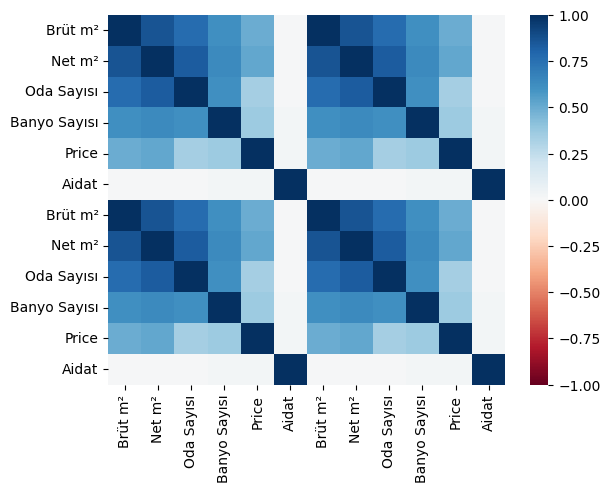

In [22]:



# Identify and one-hot encode categorical columns
categorical_columns = selectedData.select_dtypes(include=['object']).columns
selectedData_encoded = pd.get_dummies(selectedData, columns=categorical_columns)

# Exclude one-hot encoded columns from the correlation matrix
numerical_columns = selectedData.select_dtypes(include=['float64', 'int64']).columns
selectedData_numerical = pd.concat([selectedData[numerical_columns], selectedData_encoded[numerical_columns]], axis=1)

# Compute and plot the correlation matrix
sns.heatmap(selectedData_numerical.corr(), cmap="RdBu", vmin=-1, vmax=1)


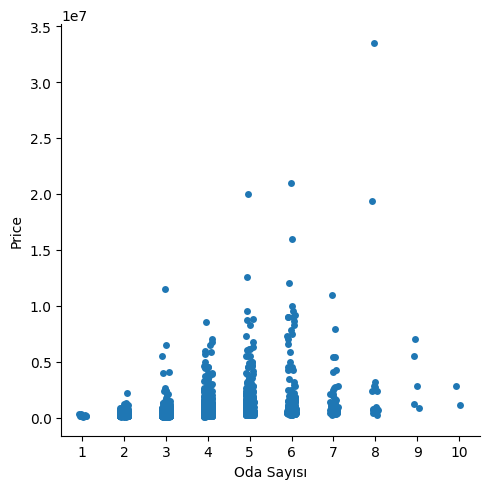

In [23]:
sns.catplot(x="Oda Sayısı", y="Price", data=selectedData)

In [24]:
selectedData_test = selectedData[["Oda Sayısı","Bina Yaşı","Price"]]
selectedData_grp = selectedData_test.groupby(["Oda Sayısı","Bina Yaşı"], as_index =False).mean()
selectedData_pivot = selectedData_grp.pivot(index ="Oda Sayısı",columns = "Bina Yaşı")
selectedData_pivot

Price                                          
Bina Yaşı              0  between 1-10 between 11-20  more than 20
Oda Sayısı                                                        
1           1.595000e+05  1.717500e+05           NaN           NaN
2           2.580682e+05  3.083728e+05  2.432632e+05  2.730484e+05
3           3.201659e+05  3.446271e+05  3.669848e+05  3.980194e+05
4           6.484097e+05  6.300056e+05  4.837634e+05  7.426873e+05
5           1.059621e+06  1.094948e+06  1.458975e+06  3.117500e+06
6           1.370896e+06  1.336980e+06  1.407500e+06  2.770000e+06
7           1.177679e+06  1.192559e+06  3.004000e+06  1.604975e+06
8           1.330556e+06  1.064600e+06  1.815000e+07  1.938000e+07
9           2.025000e+06  8.250000e+05  6.250000e+06           NaN
10          2.800000e+06           NaN           NaN  1.100000e+06

In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Identify and label encode categorical columns
label_encoder = LabelEncoder()
selectedData_encoded = selectedData.copy()
categorical_columns = selectedData_encoded.select_dtypes(include=['object']).columns
selectedData_encoded[categorical_columns] = selectedData_encoded[categorical_columns].apply(label_encoder.fit_transform)

# Exclude categorical columns from the correlation matrix
numerical_columns = selectedData_encoded.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = selectedData_encoded[numerical_columns].corr()
print(correlation_matrix)

                      Brüt m²    Net m²  Oda Sayısı  Banyo Sayısı  \
Brüt m²              1.000000  0.866555    0.766373      0.610043   
Net m²               0.866555  1.000000    0.831350      0.633701   
Oda Sayısı           0.766373  0.831350    1.000000      0.617010   
Banyo Sayısı         0.610043  0.633701    0.617010      1.000000   
Binadaki Kat Sayısı  0.048141 -0.002058   -0.029241      0.100349   
Bulunduğu Kat       -0.016680 -0.002226   -0.002714     -0.021457   
Bina Yaşı            0.008780  0.007618   -0.001117     -0.127067   
Isıtma Tipi          0.015158 -0.022988   -0.028914      0.069086   
Mobilya Durumu       0.076209  0.070320    0.044884      0.121316   
Kullanım Durumu      0.022692  0.036919    0.023146     -0.040143   
Yapının Durumu       0.042380  0.033854    0.016778     -0.016709   
Konut Şekli          0.327088  0.373884    0.423527      0.309275   
Kimden              -0.015648  0.002912   -0.039967     -0.009095   
Krediye Uygun       -0.004704 -0.0

<Axes: >

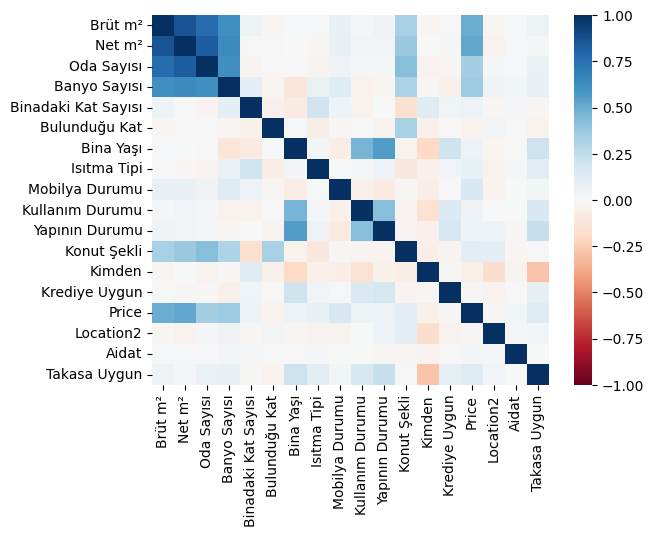

In [26]:
sns.heatmap(correlation_matrix, cmap="RdBu", vmin=-1, vmax=1)

In [27]:
#print(df['Location1'].value_counts())

<Axes: xlabel='Net m² binned', ylabel='Price'>

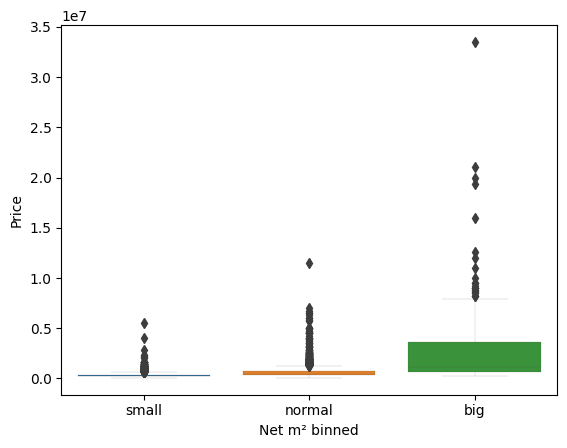

In [28]:
sns.color_palette("Paired")
sns.boxplot(x="Net m² binned", y="Price", data=selectedData,linewidth=0.1)

In [29]:
selectedData.head()
selectedData = pd.get_dummies(selectedData,drop_first = True)

In [30]:
selectedData_numerical

Brüt m²  Net m²  Oda Sayısı  Banyo Sayısı   Price  Aidat  Brüt m²  \
3          95    80.0           3             1  235000    0.0       95   
8         110   100.0           3             1  215000    0.0      110   
11        160   145.0           4             1  420000    0.0      160   
13        180   160.0           4             2  400000    0.0      180   
14        180   155.0           4             2  550000  330.0      180   
...       ...     ...         ...           ...     ...    ...      ...   
6973      220   219.0           6             2  395000    0.0      220   
6974      175   170.0           5             2  350000    0.0      175   
6978      165   155.0           5             1  400000    0.0      165   
6980      136   120.0           4             2  550000    0.0      136   
6983       60    50.0           4             2  250000    0.0       60   

      Net m²  Oda Sayısı  Banyo Sayısı   Price  Aidat  
3       80.0           3             1  235000    0.0  
8      100.0           3             1  215000    0.0  
11     145.0           4             1  420000    0.0  
13     160.0           4             2  400000    0.0  
14     155.0           4             2  550000  330.0  
...      ...         ...           ...     ...    ...  
6973   219.0           6             2  395000    0.0  
6974   170.0           5             2  350000    0.0  
6978   155.0           5             1  400000    0.0  
6980   120.0           4             2  550000    0.0  
6983    50.0           4             2  250000    0.0  

[5151 rows x 12 columns]

In [31]:
# Split X into random train and test subsets and normalize it
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
X = selectedData.drop("Price",axis = 1)
Y = selectedData["Price"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train





array([[-0.46925055, -0.49123514, -0.59474866, ...,  0.62815933,
        -0.87044769, -0.21550898],
       [ 3.28473495,  3.57933271,  2.17894982, ...,  0.62815933,
        -0.87044769,  4.6401778 ],
       [-0.55456841, -0.49123514, -0.59474866, ...,  0.62815933,
        -0.87044769, -0.21550898],
       ...,
       [-0.46925055, -0.49123514, -0.59474866, ..., -1.5919528 ,
        -0.87044769, -0.21550898],
       [-0.74226768, -1.24107659, -1.51931482, ...,  0.62815933,
        -0.87044769, -0.21550898],
       [ 2.09028501,  0.1514861 ,  0.3298175 , ...,  0.62815933,
         1.14883411, -0.21550898]])

In [32]:
#1 Linear regression
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train,Y_train)

In [33]:
reg.score(X_train,Y_train)

0.5959549496740764

In [34]:
reg.score(X_test,Y_test)

-6.621637930488695e+20

In [35]:
# Lasso regression
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha = 1000,max_iter=1000,tol=0.1)
lasso_reg.fit(X_train,Y_train)

Lasso(alpha=1000, tol=0.1)

In [36]:
lasso_reg.score(X_train,Y_train)

0.5949604258152013

In [37]:
lasso_reg.score(X_test,Y_test)

0.5361192449440781

In [38]:
# Ridge regression
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=1000, max_iter=1000, tol= 0.1)
ridge_reg.fit(X_train,Y_train)

Ridge(alpha=1000, max_iter=1000, tol=0.1)

In [39]:
ridge_reg.score(X_train,Y_train)

0.5570531071634821

In [40]:
ridge_reg.score(X_test,Y_test)

0.538032884485803

# Conclusion: 
In conclusion,we can see that the scores are not very high, and this could be due to factors such as data quality, process complexity, or even incorrect assumptions.

And this could be improved in further work and further work. 